<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-E.-coli-Expression-Dataset" data-toc-modified-id="The-E.-coli-Expression-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The <em>E. coli</em> Expression Dataset</a></span></li><li><span><a href="#Experimental-Metadata" data-toc-modified-id="Experimental-Metadata-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experimental Metadata</a></span></li><li><span><a href="#Quality-Control" data-toc-modified-id="Quality-Control-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Quality Control</a></span></li><li><span><a href="#Centering-to-reference-condition" data-toc-modified-id="Centering-to-reference-condition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Centering to reference condition</a></span></li><li><span><a href="#Save-centered-dataset" data-toc-modified-id="Save-centered-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save centered dataset</a></span></li><li><span><a href="#Run-ICA" data-toc-modified-id="Run-ICA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Run ICA</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from os.path import join
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# The *E. coli* Expression Dataset

In [2]:
log_tpm = pd.read_csv(join('data','log_tpm.csv'),index_col=0)

**Transcripts per million (TPM):** Normalizes expression levels to gene length and library size

$$ TPM_i = \frac{X_i}{l_i} * \left(\frac{1}{\sum_j{\frac{X_j}{l_j}}}\right) $$

$$ \text{log-TPM} = log_2{(TPM + 1)} $$

where $X_i$ is the number of reads mapped to gene $i$ and  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$l_i$ is the normalized length of gene $i$  

In [ ]:
n_genes,m_samples = log_tpm.shape
print('{} genes x {} samples'.format(n_genes,m_samples))

We removed low-expression genes to reduce noise (max FPM < 10)

$$ FPM = \frac{X_i}{\sum_j{X_j}} $$

In [3]:
log_tpm.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


# Experimental Metadata

The metadata file contains comprehensive information on experimental conditions

In [4]:
metadata = pd.read_csv(join('data','metadata.csv'),index_col=0)

In [5]:
# List of experiment attributes
metadata.columns

Index(['Study', 'Project ID', 'Condition ID', 'Replicate #',
       'Strain Description', 'Strain', 'Base Media', 'Carbon Source (g/L)',
       'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture',
       'Supplement', 'Temperature (C)', 'pH', 'Antibiotic', 'Culture Type',
       'Growth Rate (1/hr)', 'Evolved Sample', 'Isolate Type',
       'Sequencing Machine', 'Additional Details', 'Biological Replicates',
       'Alignment', 'DOI', 'GEO'],
      dtype='object')

In [6]:
metadata.head()

,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
Sample ID,,,,,,,,,,,,,,,,,,,,,
control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.33,doi.org/10.1101/080929,GSE65643
control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.24,doi.org/10.1101/080929,GSE65643
fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,0.00,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,0.00,No,NaN,MiSeq,NaN,2,98.30,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,1.06,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900


In [7]:
# Accessing specific attributes
metadata[metadata['Carbon Source (g/L)'] == 'pyruvate(3.3)']

,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
Sample ID,,,,,,,,,,,,,,,,,,,,,
omics__bw_pyr__1,Omics,omics,bw_pyr,1,Escherichia coli BW25113,BW25113,M9,pyruvate(3.3),NH4Cl(1),O2,...,Batch,0.37,No,NaN,MiSeq,NaN,2,97.36,doi.org/10.1038/ncomms13091,GSE59759
omics__bw_pyr__2,Omics,omics,bw_pyr,2,Escherichia coli BW25113,BW25113,M9,pyruvate(3.3),NH4Cl(1),O2,...,Batch,0.37,No,NaN,MiSeq,NaN,2,97.59,doi.org/10.1038/ncomms13091,GSE59759
ica__ura_pyr__1,ICA,ica,ura_pyr,1,Escherichia coli K-12 MG1655,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,...,Batch,0.27,No,NaN,HiSeq 4000,NaN,2,93.77,NaN,GSE122295
ica__ura_pyr__2,ICA,ica,ura_pyr,2,Escherichia coli K-12 MG1655,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,...,Batch,0.27,No,NaN,HiSeq 4000,NaN,2,93.96,NaN,GSE122295


# Quality Control

Filtering out poorly correlated replicates improves ICA outcomes (Pearson R < 0.95)

Text(0, 0.5, 'Count')

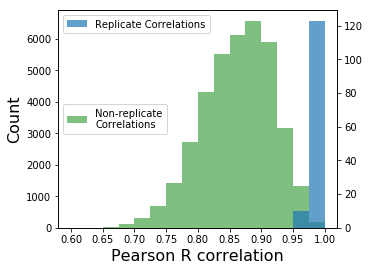

In [8]:
rep_corrs = []
other_corrs = []
for r1,r2 in itertools.combinations(metadata.index,2):
    if r1[:-3] == r2[:-3]:
        rep_corrs.append(stats.pearsonr(log_tpm[r1],log_tpm[r2])[0])
    else:
        other_corrs.append(stats.pearsonr(log_tpm[r1],log_tpm[r2])[0])

fig,ax = plt.subplots(figsize=(5,4))
ax2 = plt.twinx(ax)
ax2.hist(rep_corrs,range=(0.6,1),bins=16,
         alpha=0.7,label='Replicate Correlations')
ax.hist(other_corrs,color='green',range=(0.6,1),
        alpha=0.5,bins=16,label='Non-replicate\nCorrelations')
ax2.legend()
ax.legend(loc=6)
ax.set_xlabel('Pearson R correlation',fontsize=16)
ax.set_ylabel('Count',fontsize=16)

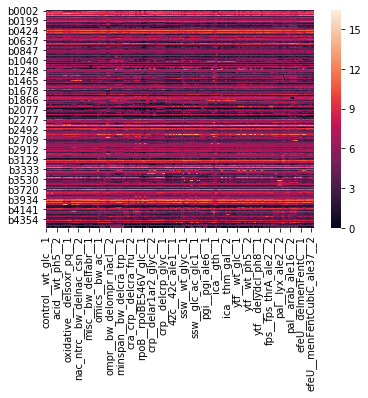

In [9]:
sns.heatmap(log_tpm)

# Centering to reference condition

**Data must be centered to a reference condition before performing ICA.**  
For *E. coli*, we chose:
* WT MG1655
* M9 minimal medium
* 2 g/L Glucose
* Aerobic respiration
* Mid-log phase
* 37C, pH 7

In [10]:
log_tpm_centered = log_tpm.sub(log_tpm[['control__wt_glc__1','control__wt_glc__2']].mean(axis=1),axis=0)

In [11]:
log_tpm_centered.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
b0002,-0.061772,0.061772,0.636527,0.819793,-0.003615,-0.289353,-1.092023,-0.777289,0.161343,0.145641,...,-0.797097,-0.791859,0.080114,0.102154,0.608180,0.657673,0.813105,0.854813,0.427986,0.484338
b0003,-0.053742,0.053742,0.954439,1.334385,0.307588,0.128414,-0.872563,-0.277893,0.428542,0.391761,...,-0.309105,-0.352535,-0.155074,-0.077145,0.447030,0.439881,0.554528,0.569030,0.154905,0.294799
b0004,-0.065095,0.065095,-0.202697,0.119195,-0.264995,-0.546017,-1.918349,-1.577736,-0.474815,-0.495312,...,-0.184898,-0.225615,0.019575,0.063986,0.483343,0.452754,0.524828,0.581878,0.293239,0.341040
b0005,0.028802,-0.028802,-0.865171,-0.951179,0.428769,0.123564,-1.660351,-1.531147,0.240353,-0.151132,...,-0.308221,-0.581714,0.018820,0.004040,-1.228763,-1.451750,-0.839203,-0.529349,-0.413336,-0.478682
b0006,0.009087,-0.009087,-0.131039,-0.124079,-0.144870,-0.090152,-0.219917,-0.046648,-0.044537,-0.089204,...,1.464603,1.415706,1.230831,1.165153,0.447447,0.458852,0.421417,0.408077,1.151066,1.198529


# Save centered dataset

In [12]:
log_tpm_centered.to_csv(join('data','log_tpm_centered.csv'))

# Run ICA

$$ \mathbf{X} = \mathbf{SA} $$

```
./run_ica.sh [options] log_tpm_centered.csv

    -i Iterations (default: 100)
    -t Tolerance (default: 1e-6)
    -n Number of CPUs
    -o Output directory (default: same as log_tpm_centered.csv)
```
* FastICA is stochastic:
     * Run ICA 100 times to find which components are reproducible
* Requires: sklearn, numpy, scipy, pandas, mpi4py
* For 278 samples across 4000 genes, this takes about 32 cpu-hours with tolerance of 1e-7  
* Higher tolerance (1e-3) will reduce run-time, but also reduce # of robust components.